# Grouping

The most common form of clustering is categorical clustering. This is extremely simple, as we simply group our data by some category. These categories are either non-numerical categories (e.g. color), or can be numerical and implemented by some comparison (e.g. bins/ranges, numerical characteristics). We are going to take a look at some simple data to start.

We are going to start by using `pandas` to group data by a column. First, let's load some data on metal bands from [metalstorm.net](https://metalstorm.net/), accumulated here on [Kaggle](https://www.kaggle.com/mrpantherson/metal-by-nation).

In [1]:
import pandas as pd

bands = pd.read_csv("../datasets/metal_bands/metal_bands_2017.csv")
bands.formed = pd.to_numeric(
    bands.formed.replace("-", "0"), downcast="integer"
)
bands.split = pd.to_numeric(bands.split.replace("-", "0"), downcast="integer")
bands

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975,United Kingdom,0,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,USA,0,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988,Sweden,0,Melodic death
...,...,...,...,...,...,...
4995,Atara,0,2006,France,2006,"Black,Grindcore"
4996,Avicularia,0,2003,Croatia,0,Avantgarde death
4997,Awake,0,2006,United Kingdom,2006,"Heavy,Progressive"
4998,Axatak,0,1983,Australia,1988,"Hard rock,Heavy"


In [2]:
bands.dtypes

band_name    object
fans          int64
formed        int16
origin       object
split         int16
style        object
dtype: object

With our data loaded the next thing we can do is *group* our data by country of origin using `groupby`. We have seen `groupby` before but we will take a close look here. Some of this will be a review and some will be new.

In [3]:
origin_groups = bands.groupby("origin")
origin_groups

Note that the return from the `groupby` function is not a list of micro data frames, it is instead a special group-by object. This object is constructed lazily - the specification is saved but the splitting of the data is not done until the groups of data are actually requested. This saves on computations and prevents unnecessary computations from being performed by performing computations on an "on demand" basis.

We can inspect the `groups` attribute of our group-by object to see our groups - it is a dictionary and so we can index it by keys. The keys here are countries from our `origin` column. We can take a peak at the USA group, but it may not be what you expect!

In [4]:
origin_groups.groups["USA"]

Index([   2,    3,    5,    6,    7,   14,   16,   26,   27,   29,
       ...
       4950, 4959, 4960, 4962, 4966, 4968, 4970, 4977, 4984, 4988],
      dtype='int64', length=1139)

This is just a list of numbers... really what this is though is a list of ***indices that represent each object that falls within that group***.

If we wanted to actually get the data corresponding to the group, we need to use the `get_group` method.

In [5]:
origin_groups.get_group("USA")

,band_name,fans,formed,origin,split,style
2,Metallica,3712,1981,USA,0,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
5,Slayer,2955,1981,USA,1981,Thrash
6,Death,2690,1983,USA,2001,"Progressive death,Death,Progressive thrash"
7,Dream Theater,2329,1985,USA,1985,Progressive
...,...,...,...,...,...,...
4968,Yellow Eyes,1,2010,USA,0,Black
4970,Your Chance To Die,1,2007,USA,0,"Melodic death,Metalcore"
4977,A Lower Deep,0,2000,USA,2000,"Progressive,Thrash,Power"
4984,Anger As Art,0,2004,USA,0,Thrash


This data frame contains all of the bands from the USA - this is the equivalent of performing the following:

In [6]:
bands[bands.origin == "USA"]

,band_name,fans,formed,origin,split,style
2,Metallica,3712,1981,USA,0,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
5,Slayer,2955,1981,USA,1981,Thrash
6,Death,2690,1983,USA,2001,"Progressive death,Death,Progressive thrash"
7,Dream Theater,2329,1985,USA,1985,Progressive
...,...,...,...,...,...,...
4968,Yellow Eyes,1,2010,USA,0,Black
4970,Your Chance To Die,1,2007,USA,0,"Melodic death,Metalcore"
4977,A Lower Deep,0,2000,USA,2000,"Progressive,Thrash,Power"
4984,Anger As Art,0,2004,USA,0,Thrash


This might make grouping seem unnecessary, but realistically what we often want to do is perform some action for each group. This action could be to compute a statistic or to visualize slices of data, and often we want to perform these actions via an aggregation or via a loop.

Before we dive into that it helps to understand how looping over a group-by object works. When we loop over a group-by object, we use multiple iterables. The first iterable is a tuple (or a single variable in this case) for the columns that we grouped by, and the second iterable is the group data frame. Below we are going to perform a loop, but break after the first few iterations (otherwise our output is too long!):

In [7]:
for idx, (origin, group) in enumerate(origin_groups):
    print(origin)
    print(group)
    print("-" * 100)
    if idx == 4:
        break

Albania
     band_name  fans  formed   origin  split                           style
4263     Gverr     2    2007  Albania   2007  Progressive death,Death,Thrash
----------------------------------------------------------------------------------------------------
Andorra
     band_name  fans  formed   origin  split                      style
317  Persefone   279    2001  Andorra   2001  Melodic death,Progressive
----------------------------------------------------------------------------------------------------
Argentina
                  band_name  fans  formed     origin  split  \
785             Rata Blanca    86    1985  Argentina   1985   
1130               Skiltron    51    2004  Argentina      0   
1358        Downfall Of Nur    37    2013  Argentina      0   
1538              Herm�tica    30    1987  Argentina   1994   
1560             Almafuerte    29    1995  Argentina      0   
1803               Vampiria    23    1997  Argentina   1997   
2008  Beto V�zquez Infinity    18

Let's say we wanted to count the number of fans for each bands from each country in our set. We could loop over the groups and accumulate the fan counts, but `pandas` gives us a much easier means of performing this by allowing us to apply aggregations to groups. There are quite a few builtin aggregations, as well as a feature that allows us to apply our own.

Usually when we apply aggregations we select a subset of columns to work on. We can apply a `sum` aggregation to the `fans` column to compute the total number of fans for each country's bands:

In [8]:
origin_groups.fans.sum()

origin
Albania                       2
Andorra                     279
Argentina                   349
Armenia                       4
Australia                  5832
                          ...  
Ukraine, Canada               5
United Kingdom            44717
United Kingdom, Greece        2
United Kingdom, USA        1684
Venezuela                     1
Name: fans, Length: 113, dtype: int64

Side note - what are `United Kingdom, Greece` and `United Kingdom, USA`?

We can also specify more than one aggregation at a time using the `agg` function:

In [9]:
origin_groups.fans.agg(["min", "max", "sum"])

,min,max,sum
origin,,,
Albania,2,2,2
Andorra,279,279,279
Argentina,1,86,349
Armenia,4,4,4
Australia,0,1083,5832
...,...,...,...
"Ukraine, Canada",5,5,5
United Kingdom,0,4195,44717
"United Kingdom, Greece",2,2,2


Conveniently we can plot after we perform some aggregation:

<Axes: xlabel='origin'>

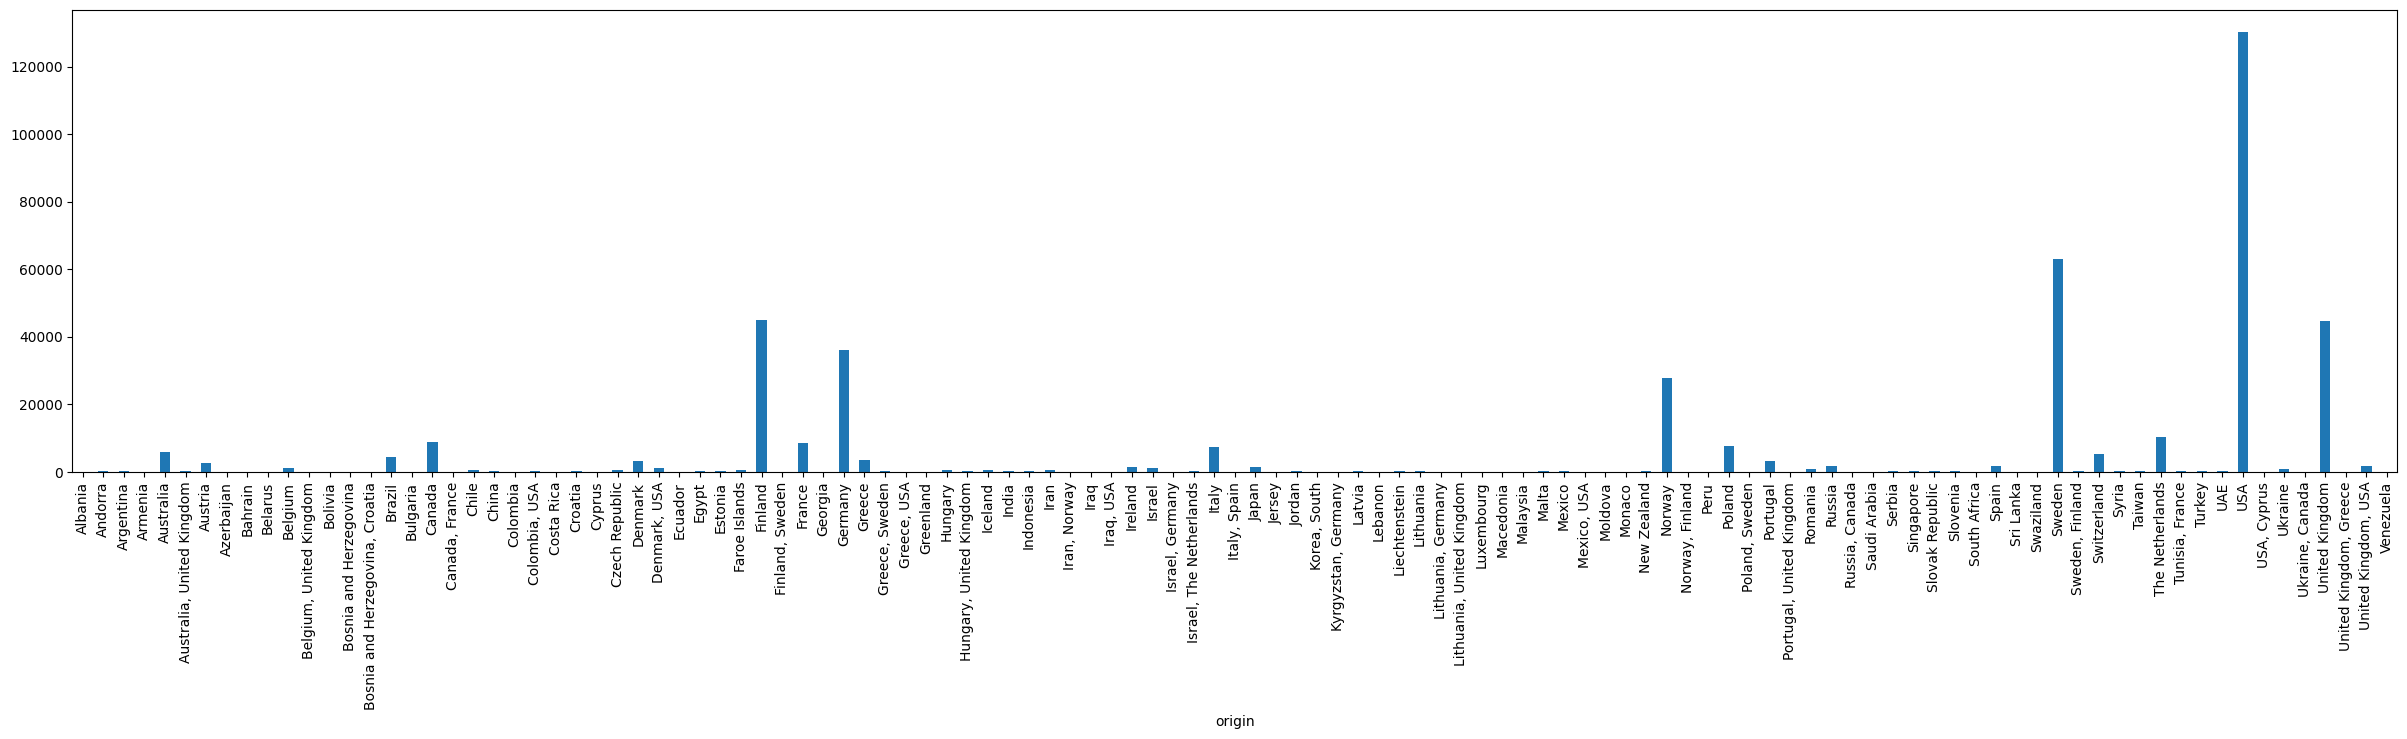

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 6))
origin_groups.fans.sum().plot.bar(use_index=True)

We have too much data! We can sort by fan count, then take the top 10 countries:

<Axes: xlabel='origin'>

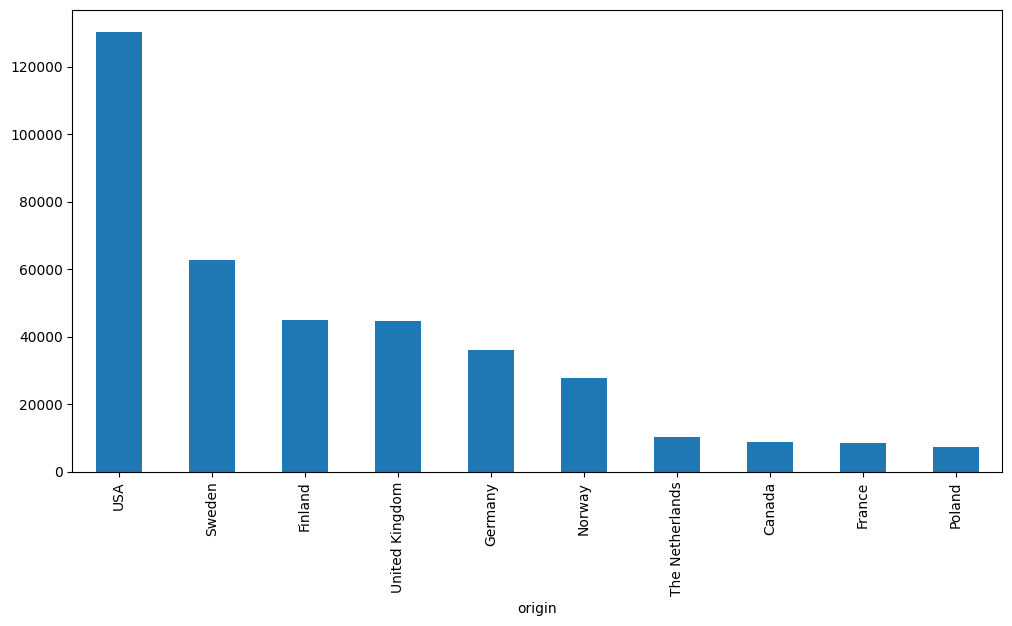

In [11]:
plt.figure(figsize=(12, 6))
origin_groups.fans.sum().sort_values(ascending=False).head(10).plot.bar(
    use_index=True
)

What would be interesting to see is how many bands these countries have associated with them. Replaying the last line of code without the plotting and instead viewing the index gives us the top 10 countries.

In [12]:
top_10_countries = (
    origin_groups.fans.sum().sort_values(ascending=False).head(10).index
)
top_10_countries

Index(['USA', 'Sweden', 'Finland', 'United Kingdom', 'Germany', 'Norway',
       'The Netherlands', 'Canada', 'France', 'Poland'],
      dtype='object', name='origin')

We can extract all of the bands from these countries:

In [13]:
top_10_df = bands[bands.origin.isin(top_10_countries)]
top_10_df

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975,United Kingdom,0,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,USA,0,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988,Sweden,0,Melodic death
...,...,...,...,...,...,...
4988,Apothesary,0,2009,USA,0,"Thrash,Melodic death"
4992,Arrest,0,1992,Germany,0,"Hard rock,Heavy"
4995,Atara,0,2006,France,2006,"Black,Grindcore"
4997,Awake,0,2006,United Kingdom,2006,"Heavy,Progressive"


Now we can group and count!

Notice we use a dictionary to specify which columns we are performing which aggregations on.

In [14]:
top_10_df.groupby("origin").agg({"band_name": "count", "fans": "sum"})

,band_name,fans
origin,,
Canada,161,8895
Finland,307,45081
France,222,8464
Germany,397,35984
Norway,222,27818
Poland,100,7527
Sweden,476,62875
The Netherlands,135,10269
USA,1139,130328


We can sort by the number of fans:

In [15]:
top_10_df.groupby("origin").agg(
    {"band_name": "count", "fans": "sum"}
).sort_values(by="fans", ascending=False)

,band_name,fans
origin,,
USA,1139,130328
Sweden,476,62875
Finland,307,45081
United Kingdom,345,44717
Germany,397,35984
Norway,222,27818
The Netherlands,135,10269
Canada,161,8895
France,222,8464


Now we can plot our DataFrames. Let's look carefully at what this line of code does:
* Starts with a DataFrame containing our top 10 metal countries (by number of metal fans)
* Groups that DataFrame by origin (country)
* Aggregates the group to count how many bands are in the country and how many total fans they have
* Sorts by number of fans
* Plots the result as a bar chart showing number of bands per country

<Axes: xlabel='origin', ylabel='# of Bands'>

<Figure size 1200x600 with 0 Axes>

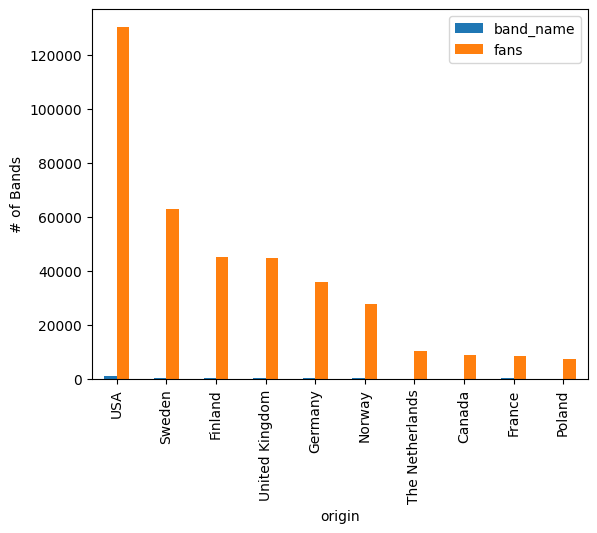

In [16]:
plt.figure(figsize=(12, 6))
top_10_df.groupby("origin").agg(
    {"band_name": "count", "fans": "sum"}
).sort_values(by="fans", ascending=False).plot.bar(
    use_index=True, ylabel="# of Bands"
)

Something is off here though. We plotted the number of bands and the number of fans on the same axis. This is confusing since we gave the axis the label "# of bands" and does not show the data well.

Let's fix this by specifying the "fans" aggregation as our secondary y axis.

Text(0, 0.5, '# of bands')

<Figure size 1200x600 with 0 Axes>

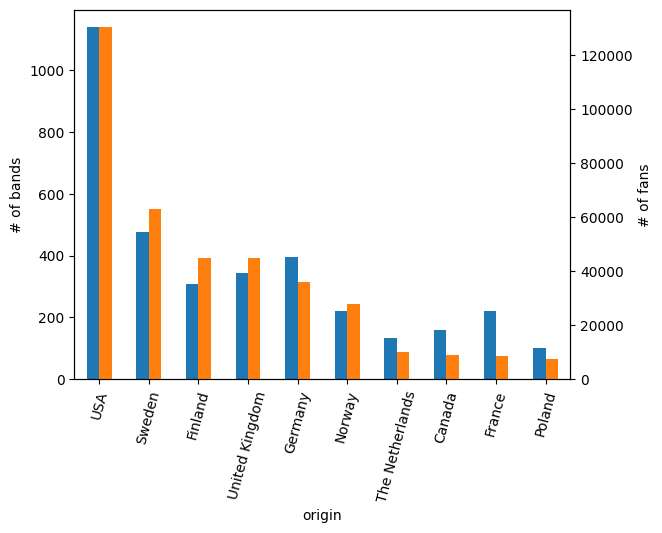

In [17]:
plt.figure(figsize=(12, 6))

ax = (
    top_10_df.groupby("origin")
    .agg({"band_name": "count", "fans": "sum"})
    .sort_values(by="fans", ascending=False)
    .plot.bar(
        use_index=True,
        ylabel="# of bands",
        secondary_y="fans",
        legend=False,
        rot=75,
    )
)
ax.right_ax.set_ylabel("# of fans")
ax.set_ylabel("# of bands")